<h1><center>  lab 6: Social Network Analysis </center>

<img src="https://files.realpython.com/media/Python-AI-How-to-Build-Your-First-Neural-Network_Watermarked.68fe2ddda7ae.jpg" width="500">


```Created by Jinnie Shin (jinnie.shin@coe.ufl.edu)```\
```Date: June 2nd 2022```

```Image source: https://realpython.com/python-encodings-guide/g```



<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQmNf86oJnfhpkPA9LnrFnAbfwF2VywPYpB_w&usqp=CAU" align="left" width="70" height="70" align="left">

 ### Required Packages or Dependencies

In [1]:
#!pip install { } ! in case you run into the `package not avaialble` error
import numpy as np
import pandas as pd
import networkx as nx

# 1. Social Network Analysis
<img src="https://miro.medium.com/max/1400/1*gaSIh_PKp8RuM0NXTT-QSA.png" width="700">

### Practice 1: Let's add nodes and edges using `add_edges()` and `add_nodes()`

|  Object Type |              Networkx         |
|:------------|:---------------------------------|
| Undirected graph G | `G = nx.Graph()`|
| Directed graph G | `G = nx.DiGraph()`|

### Let's add the nodes first

NodeView((1, 2, 3, 4, 5))

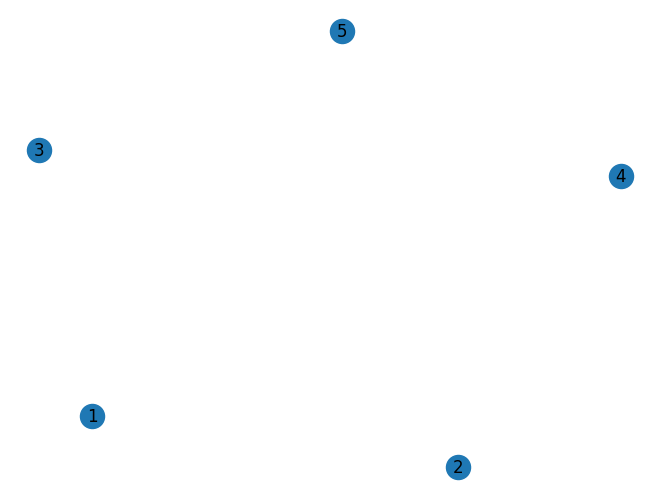

In [2]:

G = nx.Graph() # first we will define an empty undirected graph

G.add_node(1) # add one node at a time

G.add_nodes_from([2,3, 4, 5]) # add a list of nodes

#nx.draw_spring(G) # draw the nextwork with a spring layout

nx.draw_spring(G, with_labels= True)

G.nodes() # if you wanted to print out the nodes

### Let's add the edges now

EdgeView([(1, 2), (1, 3), (2, 3), (4, 5)])

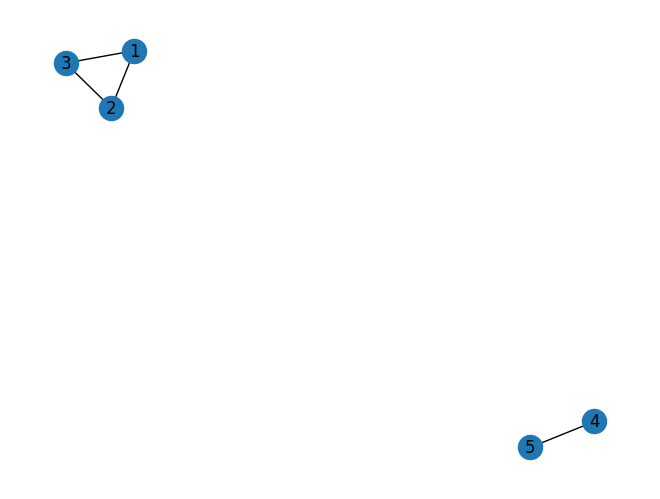

In [3]:

G.add_edge(2, 3) # add an edge between the nodes 2 and 3

G.add_edges_from([(1, 2), (1, 3), (4, 5)]) # add a list of edges

nx.draw_spring(G, with_labels= True)

np.asarray(nx.adjacency_matrix(G))

G.edges() # if you wanted to print out the edges

<img src="https://i.pinimg.com/736x/2e/aa/7d/2eaa7d5021ca7c3c98bc93b98b9646fe.jpg" align="left" width="70" height="70" align="left">


### Task 1: Create a undirected graph using `networkx`

> **Q1:** Your task is to create a following network `H` either using an **adjaceny matrix**, or by manually adding the edges and nodes.

<img src="https://i.stack.imgur.com/0AyxF.png" width="700">


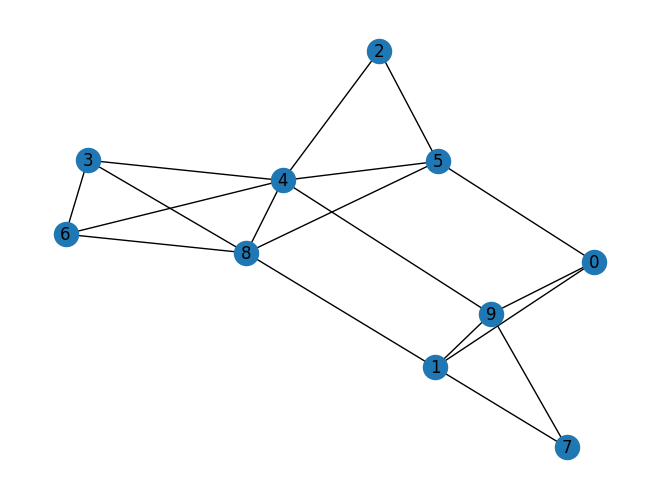

In [ ]:
############ your code here ################

H= nx.Graph()
H.add_nodes_from(list(range(0,10)))
H.add_edges_from([(0,1), (0,5), (0,9), (1, 9), (1, 8), (1,7),
                  (2,4), (2,5), (3,6), (3,4), (3,8), (4,5), (4,6), (4,8), (4,9),
                  (5, 8), (6,8), (7,9)])

H.edges()
nx.draw_spring(H, with_labels= True)



#############################################

> **Q2:** Compute the following nextwork statistics
>> - The degree centrality using `nx.degree_centrality(H)`
>> - The closeness centrality using `nx.closeness_centrality(H)`
>> - The betweenness centralit using `nx.betweenness_centrality(H)`
>> - Eigenvector centrality using `nx.eigenvector_centrality(H)`

More indices available: https://networkx.org/documentation/stable/reference/algorithms/centrality.html

In [ ]:
############ your code here ################


#############################################

> Q3: Let's visualize the network using `nx.draw()`

{0: 0.22880202442658323,
 1: 0.27629861368531533,
 2: 0.2077790459394657,
 3: 0.3097388627571085,
 4: 0.47845134147622453,
 5: 0.3418675316651441,
 6: 0.3097388627571085,
 7: 0.14221012795963686,
 8: 0.4346709465706551,
 9: 0.28514663579302296}


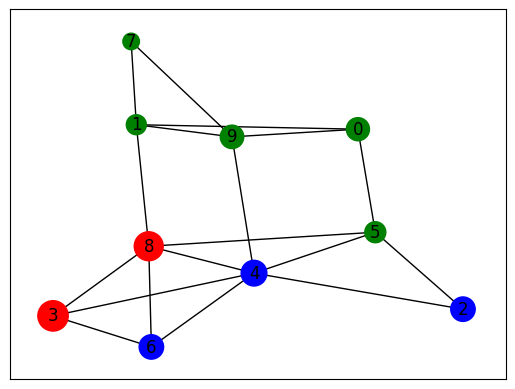

In [ ]:
############ your code here ################
import matplotlib.pyplot as plt
from pprint import pprint

centrality = nx.eigenvector_centrality(H)

pprint(centrality)

# Set the node sizes based on eigenvector centrality values
node_sizes = [centrality[node] * 1000 for node in G.nodes()]

# Set the node colors based on centrality rank
node_colors =  ['red' if centrality[node] > 0.4 else
                'green' if centrality[node] < 0.3 else
                'blue' for node in G.nodes()]


# Draw the graph
pos = nx.spring_layout(H)

nx.draw_networkx(H,  # network name
                 pos, # layout
                 node_size=node_sizes, #size of the node based on centrality
                 node_color=node_colors, #colour of the node based on centrality
                 with_labels=True) # name of the node (e.g., 1, 2, )

# Show the plot
plt.show()


#############################################

#  2. Advanced Algorithms in SNA
- ###  HITS (Hyperlink Induced Topic Search)
> The algorithm is used to the web link-structures to discover and rank the webpages relevant for a particular search. HITS uses **hubs** and **authorities** to define a recursive relationship between webpages.
> - Authority: A node is high-quality if many high-quality nodes link to it
> - Hub: A node is high-quality if it links to many high-quality nodes

- #### Algorithm Steps
1. Initialize the hub and authority of each node with a value of 1
2. For each iteration, update the hub and authority of every node in the graph
3. The new authority is the sum of the hub of its parents
4. The new hub is the sum of the authority of its children
5. Normalize the new authority and hub

- #### Zachary’s Karate Club graph Data (from networkx)

> Each node in the returned graph has a node attribute 'club' that indicates the name of the club to which the member represented by that node belongs, either `Mr. Hi` or `Officer`.

{'club': 'Mr. Hi'}

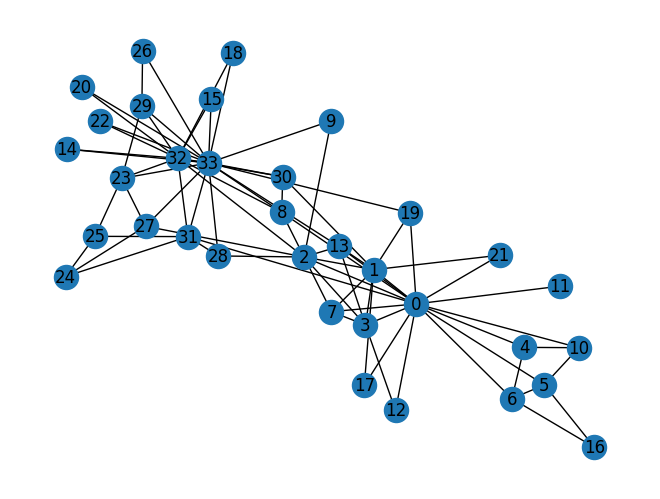

In [85]:

ex =  nx.karate_club_graph()

# Let's take a look at how many nodes/edges we have in this data `ex`
ex.nodes()
ex.edges()

# Let's visualize the network
pos= nx.spring_layout(ex)
nx.draw(ex, pos, with_labels=True)


# Let's look at the metadata
ex.nodes[5]#['club']


<img src="https://i.pinimg.com/736x/2e/aa/7d/2eaa7d5021ca7c3c98bc93b98b9646fe.jpg" align="left" width="70" height="70" align="left">

 ## Task 2: Identifying Hubs and Authorities
 > **STEP 1**: Apply the HITS algorithm using `hubs, authorities = nx.hits(ex, normalized = True)`\
 > **STEP 2**: Print hub and authories

In [88]:
#Let's apply the HITS algorithm
hubs, authorities = nx.hits(ex, max_iter = 1000, normalized = True)
print(hubs)
print(authorities)



{0: 0.0668777878017573, 1: 0.06460820139870788, 2: 0.07720593702807281, 3: 0.04251538956587159, 4: 0.011920567930085262, 5: 0.014437084548291429, 6: 0.014227285240639466, 7: 0.038204301104034236, 8: 0.05287480008426346, 9: 0.010749022088966229, 10: 0.009813389569912068, 11: 0.009251077981447942, 12: 0.0089647661411336, 13: 0.05149077757366965, 14: 0.017029873773128708, 15: 0.02421897874783749, 16: 0.0039650880946078895, 17: 0.009146428782312343, 18: 0.010469361240848756, 19: 0.01572002473101378, 20: 0.013435321285774317, 21: 0.012125472243659391, 22: 0.01734416999434312, 23: 0.04668552502066942, 24: 0.01093012625586085, 25: 0.026246198040701777, 26: 0.012553159895365174, 27: 0.03162054846552676, 28: 0.018444663444097793, 29: 0.029083323651041326, 30: 0.033896584340598744, 31: 0.044846896017269135, 32: 0.07114077395376943, 33: 0.07795709396472078}
{0: 0.06687778780175724, 1: 0.06460820139870789, 2: 0.07720593702807284, 3: 0.04251538956587159, 4: 0.011920567930085267, 5: 0.01443708454829

#  3. Social Network Analysis and Educational Assessments
## 1. Community Detection
> In this task, we will try to find a "natural" social communities that occur during the problem-solving assessment. Students could interact with each other to get / provide help.
<img src="https://miro.medium.com/proxy/1*fVGpU47jjKRVKdiYqeODkw.png" width="400">


> Potential questions we may need to ask/answer:
>> - RQ1: Do students in the same communitiy share similar problem solving strategies?
>> - RQ2: Does the community associate with students' problem-solving abilities?
>> - So many more!!

### 1.1 Let's import the dataset

In [11]:
import pandas as pd
edge_list = pd.read_csv('https://raw.githubusercontent.com/jinnieshinufl/EDF-6938-Computational-Psychometrics/main/2022/week4_data/data.txt',
                        header=None, sep=' ')
edge_list = list(zip(edge_list[0], edge_list[1]))[:100] # first 100
G = nx.Graph()
G.add_edges_from(edge_list)

# let's see how many students we have in this network

# let's see how many interactions we caputered



The **Girvan-Newmann algorithm** tries to separate a network into communities (see: https://en.wikipedia.org/wiki/Girvan–Newman_algorithm)
- by cutting these edges with high betweenness centrality
- calculates edge betweenness centrality for every edge and then removes the one with the highest score
- repeated until the desired number of communities is identified

### 1.2 Let's visualize the original network first

In [ ]:
### Let's explore!

In [90]:
!pip install pyvis

from pyvis.network import Network # we will use this python visualizer `pyvis`. !pip install pyvis

g=Network(height=800, width=800, notebook=True, font_color="black", cdn_resources='remote') # here 'g' represents the network generator
g.toggle_hide_edges_on_drag(True)

g.from_nx(G)
g.show_buttons(filter_=True)

g.show('Student_network_original.html') #this should be in your folder now

from IPython.core.display import display, HTML
display(HTML('Student_network_original.html'))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Student_network_original.html


### 1.3 Let's apply the Girvan–Newman algorithm for community detection

In [14]:
from networkx.algorithms import community
communities_generator = community.girvan_newman(G)

communities = tuple(sorted(c) for c in next(communities_generator))

In [16]:
### Let's explore!


### 1.4 Let's apply the k clique algorithm for community detection

<img src="https://www.researchgate.net/profile/Yuhua-Li-14/publication/241047149/figure/fig2/AS:669133683306496@1536545310002/K-cliques-and-k-clique-clusters.png" width="600">

> **a k-clique** is a relaxed clique, i.e., a k-clique is a quasi-complete sub-graph. A k-clique in a graph is a sub-graph where the distance between any two vertices is no greater than k\
> Image Source: https://www.researchgate.net/profile/Yuhua-Li-14/publication/241047149/figure/fig2/AS:669133683306496@1536545310002/K-cliques-and-k-clique-clusters.png

## 2. Problem solving process modelling
- US Public use data (PIAAC - US Public Use Files (PUF) 2012.csv)
- export_raw_log_for_all_items_all_variables.txt

> Booklet Info: https://piaac-logdata.tba-hosting.de/additionalinformation.html \
> General event type description: https://piaac-logdata.tba-hosting.de/additionalinformation.html \
> Code book: https://docs.google.com/spreadsheets/d/1OJwlib4qiWpCgn35tHgbKhG0qX5-76Vd/edit?usp=drive_web&ouid=111988984904105753234&rtpof=true

#### Import the data

In [54]:
import pandas as pd

# this is to import and generate a dataframe using the process data
dat = pd.read_csv('export_raw_log_for_all_items_all_variables copy.tsv', sep='\t')
dat['Student_id'] = dat.CNTRYID + '_' + dat.SEQID.astype(str )
dat = dat.set_index('Student_id')

dat2 = pd.read_csv('PIAAC - US Public Use Files (PUF) 2012.csv')

<ipython-input-54-c6c30bdd2eaf>:8: DtypeWarning: Columns (8,9,10,21,22,23,75,104,106,107,108,117,118,240,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,281,282,283,284,285,286,287,288,289,290,291,292,294,296,299,308,309,315,316,317,324,393,395,396,397,398,409,410,411,414,421,422,426,427,437,441,445,449,453,457,461,465,469,473,477,485,497,501,505,509,513,517,521,529,533,537,541,545,557,561,565,569,573,577,581,585,597,605,609,613,617,641,645,653,657,661,665,669,673,677,681,685,689,693,697,701,705,709,713,717,721,725,729,733,737,741,745,749,753,757,761,765,769,773,777,781,785,789,793,797,801,805,809,813,821,829,833,837,841,845,849,896,898,899,900,901,903,904,907,908,909,917,918,919,920,921,922,923,924,925,926,927,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,958,960,962,964,966,968,970,972,974,976,978,980,982,984,986,988,990,992,994,996,998,1000,1002,1004,1006,1008,1010,1012,1286,1304) have mixed types. Specify dtype o

In [55]:
dat

,CNTRYID,SEQID,booklet_id,item_id,event_name,event_type,timestamp,event_description
Student_id,,,,,,,,
ZA6712_US.data_1,ZA6712_US.data,1,L12,1,taoPIAAC,START,0,TEST_TIME=356
ZA6712_US.data_1,ZA6712_US.data,1,L12,1,stimulus,initialized,438,C315B512
ZA6712_US.data_1,ZA6712_US.data,1,L12,1,stimulus,cba_event,1135,<cbaloggingmodel:CBAItemLogEntry xmlns:cbalogg...
ZA6712_US.data_1,ZA6712_US.data,1,L12,1,stimulus,cba_event,22135,<cbaloggingmodel:ImageMapLogEntry xmlns:cbalog...
ZA6712_US.data_1,ZA6712_US.data,1,L12,1,taoPIAAC,NEXT_INQUIRY,23798,REQUEST
...,...,...,...,...,...,...,...,...
ZA6712_US.data_2642,ZA6712_US.data,2642,PS2,1,taoPIAAC,DOACTION,238127,action=tao_item.nextInquiry
ZA6712_US.data_2642,ZA6712_US.data,2642,PS2,1,stimulus,BUTTON,240673,id=endtask_txt3
ZA6712_US.data_2642,ZA6712_US.data,2642,PS2,1,stimulus,CONFIRMATION_CLOSED,240673,action=OK


#### Necessary functions to preprocess the data

In [56]:
def item_score(x):
    try:
        x= [i for i in x if 'result=' in i]
        x = x[0].replace('result="true"', '1')
        x = x.replace('result="false"', '0')
        return x
    except:
        None

def item_name(x):
    try:
        x = [i for i in x if 'name=' in i]
        x = x[0].split('=')[1].replace('"', '')
        return x
    except:
        None

def data_import(dat, dat2):
    temp = dat[dat.event_type =='ItemScore']['event_description'].apply(lambda x: x.split(' '))
    score= temp.apply( item_score)
    name = temp.apply(item_name)
    data = pd.concat([score, name], axis=1)
    data.columns = ['score', 'item_number']
    data = data.reset_index()

    # this is the final public use data = dat2[dat2.SEQID.isin(dat.SEQID.tolist())]
    dat2 = dat2[dat2.SEQID.isin(dat.SEQID.tolist())]
    pbs = [i for i in dat2.columns if 'U' ==i[0]]
    dat2_pbs = dat2[['SEQID']+pbs] # Let's drop any column that has no participation

    dat_pbs = dat[dat.booklet_id.isin(['PS1', 'PS2'])]
    dat2_pbs = dat2_pbs[dat2_pbs.SEQID.isin(dat_pbs.SEQID.tolist())]

    dat2_pbs = dat2_pbs.set_index('SEQID')
    return dat_pbs, dat2_pbs

dat_pbs, dat2_pbs = data_import(dat, dat2)
booklet_assign = pd.DataFrame(dat_pbs.groupby('SEQID')['booklet_id'].apply(set))

#### visualize participants' item solving process

In [67]:

def visualize_action(SEQID =10, item=1, book='PS1'):
    import networkx as nx
    G = nx.DiGraph()
    ex_actions = dat_pbs[(dat_pbs.SEQID == SEQID) & (dat_pbs.item_id ==item) & (dat_pbs.booklet_id == book)][['event_type', 'timestamp']]
    time = ex_actions['timestamp'].diff().fillna(0)

    edges = []
    for i in range(len(ex_actions['event_type'].tolist())):
        try:
            temp = (ex_actions['event_type'].tolist()[i], ex_actions['event_type'].tolist()[i+1])
            edges.append(temp)
        except:
            None
    import networkx as nx
    #G=nx.from_edgelist(edges)
    from collections import Counter
    weight_dic = dict(Counter(edges))
    G = nx.Graph()
    G.add_nodes_from(ex_actions['event_type'].tolist())
    for i, j in zip(edges, time.tolist()):
        G.add_edge(i[0], i[1], weight=weight_dic[(i[0], i[1])] )
    G.add_node('START',size=15, group=2)
    return G

G= visualize_action(SEQID=10, item=1, book='PS1') # this is your controller

from IPython.core.display import display, HTML
from pyvis.network import Network
g=Network(height=800, width=800, notebook=True, font_color="black", cdn_resources='remote')
g.toggle_hide_edges_on_drag(True)
#g.barnes_hut()
g.from_nx(G)
#g.show_buttons(filter_=True)
g.show('item_solving_steps.html')
display(HTML('item_solving_steps.html'))



item_solving_steps.html


### TASK 1: Aggergate the actions

In [72]:

def visualize_action(item=1, book='PS1'):
    import networkx as nx
    G = nx.DiGraph()
    ex_actions = dat_pbs[(dat_pbs.item_id ==item) & (dat_pbs.booklet_id == book)][['event_type', 'timestamp']]
    time = ex_actions['timestamp'].diff().fillna(0)

    edges = []
    for i in range(len(ex_actions['event_type'].tolist())):
        try:
            temp = (ex_actions['event_type'].tolist()[i], ex_actions['event_type'].tolist()[i+1])
            edges.append(temp)
        except:
            None
    import networkx as nx
    #G=nx.from_edgelist(edges)
    from collections import Counter
    weight_dic = dict(Counter(edges))
    G = nx.Graph()
    G.add_nodes_from(ex_actions['event_type'].tolist())
    for i, j in zip(edges, time.tolist()):
        G.add_edge(i[0], i[1], weight=weight_dic[(i[0], i[1])] )
    G.add_node('START',size=15, group=2)
    return G

G= visualize_action(item=1, book='PS1') # this is your controller

from pyvis.network import Network
g=Network(height=800, width=800, notebook=True, font_color="black", cdn_resources='remote')
g.toggle_hide_edges_on_drag(True)
#g.barnes_hut()
g.from_nx(G)
#g.show_buttons(filter_=True)
g.show('item_solving_steps_all.html')
display(HTML('item_solving_steps_all.html'))



item_solving_steps_all.html


In [ ]:
#Let's print all the nodes



In [ ]:
#Let's print all the edges



### TASK 2: Network Statistics

In [73]:
def getCentralization(centrality, c_type):
    c_denominator = float(1)
    n_val = float(len(centrality))
    if (c_type=="degree"):
        c_denominator = (n_val-1)*(n_val-2)

    if (c_type=="close"):
        c_top = (n_val-1)*(n_val-2)
        c_bottom = (2*n_val)-3
        c_denominator = float(c_top/c_bottom)

    if (c_type=="between"):
        c_denominator = (n_val*n_val*(n_val-2))

    if (c_type=="eigen"):

        c_denominator = np.sqrt(2)/2 * (n_val - 2)

    c_node_max = max(centrality.values())
    c_sorted = sorted(centrality.values(),reverse=True)

    c_numerator = 0

    for value in c_sorted:
        if c_type == "degree":
            #remove normalisation for each value
            c_numerator += (c_node_max*(n_val-1) - value*(n_val-1))
        else:
            c_numerator += (c_node_max - value)

    network_centrality = float(c_numerator/c_denominator)

    if c_type == "between":
        network_centrality = network_centrality * 2

    return network_centrality


In [74]:
# Get the network centralization score
centrality =  nx.eigenvector_centrality(G)
getCentralization(centrality, 'eigen')

# Get network density
nx.density(G)


0.2192513368983957

#### Get the network statistics for inidividual graphs

In [82]:
def visualize_action(SEQID =10, item=1, book='PS1'):
    import networkx as nx
    G = nx.DiGraph()
    ex_actions = dat_pbs[(dat_pbs.SEQID == SEQID) & (dat_pbs.item_id ==item) & (dat_pbs.booklet_id == book)][['event_type', 'timestamp']]
    time = ex_actions['timestamp'].diff().fillna(0)

    edges = []
    for i in range(len(ex_actions['event_type'].tolist())):
        try:
            temp = (ex_actions['event_type'].tolist()[i], ex_actions['event_type'].tolist()[i+1])
            edges.append(temp)
        except:
            None
    import networkx as nx
    #G=nx.from_edgelist(edges)
    from collections import Counter
    weight_dic = dict(Counter(edges))
    G = nx.DiGraph()
    G.add_nodes_from(ex_actions['event_type'].tolist())
    for i, j in zip(edges, time.tolist()):
        G.add_edge(i[0], i[1], weight=weight_dic[(i[0], i[1])] )
    G.add_node('START',size=15, group=2)
    return G

def network_stats(item=1, book='PS1'):
    val1=[]
    val2=[]
    val3=[]
    students = list(set(dat_pbs.SEQID))
    for i in students:
        #print('analyze ----- ', i )
        G= visualize_action(SEQID = i, item=item, book=book)
        #print(G.is_directed())
        centrality =  nx.betweenness_centrality(G)
        val1.append(getCentralization(centrality, 'between'))
        try:
            ########### YOUR CODE HERE #################
            # Compute the network density and append it to val2
            density = nx.density(G)
            val2.append(density)

            #############################################
        except:
            val2.append(np.nan)
        try:
            ########### YOUR CODE HERE #################
            # Compute the network hierarchy using `nx.flow_hierarchy()` and append it to val2
            hierarchy = nx.flow_hierarchy(G)
            val3.append(hierarchy)

            #############################################

        except:
            val3.append(np.nan)


        ############################YOUR CODE HERE##############################
        # Anything else you would like to add?


        ########################################################################

    result = pd.DataFrame(list(zip(val1, val2, val3)))
    result.columns = ['centralization', 'density', 'flow']
    result['SEQID'] = students
    result = result.set_index('SEQID')
    return result


### Task 3: Evaluating Various Network Statistics

> Items in PS1 booklet

In [83]:
#Let's test the correlation with the final score

items_ps1 =  ['U01a000S', 'U01b000S',  'U03a000S',  'U06a000S','U06b000S','U21x000S', 'U04a000S']

items = range(1, 8 )
result_df =[]
for i,j  in zip(items, items_ps1):
    result= network_stats(item=i, book='PS1') #for PS1 first
    result['score'] = dat2_pbs[j].replace({'N':np.nan}).astype(float)
    print(result.corr())
    result_df.append(result)

                centralization   density      flow     score
centralization        1.000000  0.846567  0.189269 -0.572547
density               0.846567  1.000000 -0.354134 -0.312643
flow                  0.189269 -0.354134  1.000000 -0.222380
score                -0.572547 -0.312643 -0.222380  1.000000
                centralization   density      flow     score
centralization        1.000000  0.833464  0.650595  0.402234
density               0.833464  1.000000  0.543042  0.554473
flow                  0.650595  0.543042  1.000000  0.513034
score                 0.402234  0.554473  0.513034  1.000000
                centralization   density      flow     score
centralization        1.000000  0.913782  0.525028  0.551967
density               0.913782  1.000000  0.191901  0.287790
flow                  0.525028  0.191901  1.000000  0.589404
score                 0.551967  0.287790  0.589404  1.000000
                centralization   density      flow     score
centralization        1.

> Items in PS2 booklet

In [ ]:
items_ps2 = ['U19a000S', 'U19b000S', 'U07x000S','U02x000S', 'U03a000S','U16x000S',  'U11b000S', 'U23x000S']

items = range(1, 8 )
result_df =[]
for i,j  in zip(items, items_ps2):
    result= network_stats(item=i, book='PS2') #for PS1 first
    result['score'] = dat2_pbs[j].replace({'N':np.nan}).astype(float)
    print(result.corr())
    result_df.append(result)